# IMPORT LIBRARIES

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import datetime

import os


# HELP FUNCTIONS

In [166]:
def backup_dataframe(df, backup_dir="backups", base_filename="df_backup"):
   # Create backup directory if it doesn't exist
   os.makedirs(backup_dir, exist_ok=True)
    
   # Generate timestamped filename
   timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
   filename = f"{base_filename}_{timestamp}.csv"
   filepath = os.path.join(backup_dir, filename)
    
   # Save DataFrame to CSV
   df.to_csv(filepath, index=False)
   print(f"✅ Backup saved to {filepath}")


# LOAD CSV

In [178]:

pd.set_option('display.max_colwidth', None)  # Show full content in columns
pd.set_option('display.max_rows', None)

In [104]:
df = pd.read_csv("dataset/imdb.csv")

# FIRST ANALYSIS

In [105]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'castNumber', 'companiesNumber',
       'averageRating', 'regions', 'externalLinks', 'writerCredits',
       'directorsCredits', 'soundMixes', 'quotesTotal'],
      dtype='object')

In [106]:
df.shape

(149531, 32)

In [107]:
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,\N,1,0,2089,1,10,2,0,4,3,short,0,False,True,0,7,16,2092,['US'],"Documentary,Short",1,3,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",9,0,1,['silent'],0
1,Un bon bock,"(5, 6]",1892,\N,12,0,183,1,10,2,0,2,0,short,0,False,True,0,6,1,183,['FR'],"Animation,Short",0,0,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",3,0,1,['silent'],0
2,Chinese Opium Den,"(4, 5]",1894,\N,1,0,195,1,10,1,0,1,0,short,0,False,True,0,5,0,195,['US'],Short,0,1,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",4,0,1,['silent'],0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,\N,1,1,2237,1,10,3,0,4,2,short,0,False,True,0,6,20,2238,['US'],"Documentary,Short",1,6,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",6,0,1,['silent'],0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,\N,1,0,13115,1,10,12,0,11,16,short,0,False,True,0,21,66,13115,['FR'],"Documentary,Short",6,5,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",21,0,2,['silent'],0


## No Null values

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149531 entries, 0 to 149530
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   originalTitle                149531 non-null  object 
 1   rating                       149531 non-null  object 
 2   startYear                    149531 non-null  int64  
 3   endYear                      149531 non-null  object 
 4   runtimeMinutes               149531 non-null  object 
 5   awardWins                    149531 non-null  int64  
 6   numVotes                     149531 non-null  int64  
 7   worstRating                  149531 non-null  int64  
 8   bestRating                   149531 non-null  int64  
 9   totalImages                  149531 non-null  int64  
 10  totalVideos                  149531 non-null  int64  
 11  totalCredits                 149531 non-null  int64  
 12  criticReviewsTotal           149531 non-null  int64  
 13 

In [109]:
# some columns do not have NaN but "\\N"
for i in df.columns:
   print((((df[f'{i}']=="\\N").value_counts())*100)/df.shape[0])


originalTitle
False    100.0
Name: count, dtype: float64
rating
False    100.0
Name: count, dtype: float64
startYear
False    100.0
Name: count, dtype: float64
endYear
True     96.232219
False     3.767781
Name: count, dtype: float64
runtimeMinutes
False    73.119286
True     26.880714
Name: count, dtype: float64
awardWins
False    100.0
Name: count, dtype: float64
numVotes
False    100.0
Name: count, dtype: float64
worstRating
False    100.0
Name: count, dtype: float64
bestRating
False    100.0
Name: count, dtype: float64
totalImages
False    100.0
Name: count, dtype: float64
totalVideos
False    100.0
Name: count, dtype: float64
totalCredits
False    100.0
Name: count, dtype: float64
criticReviewsTotal
False    100.0
Name: count, dtype: float64
titleType
False    100.0
Name: count, dtype: float64
awardNominationsExcludeWins
False    100.0
Name: count, dtype: float64
canHaveEpisodes
False    100.0
Name: count, dtype: float64
isRatable
False    100.0
Name: count, dtype: float64
isAdult

In [110]:
# replace \\N with NaN and list how many we have for each feature
missing_values = df.replace('\\N', pd.NA).isna().sum().sort_values(ascending=False)
df = df.replace('\\N', pd.NA)

In [111]:
missing_values

endYear                        143897
runtimeMinutes                  40195
countryOfOrigin                 39987
genres                           2691
originalTitle                       0
companiesNumber                     0
userReviewsTotal                    0
ratingCount                         0
castNumber                          0
regions                             0
averageRating                       0
isAdult                             0
externalLinks                       0
writerCredits                       0
directorsCredits                    0
soundMixes                          0
numRegions                          0
isRatable                           0
rating                              0
canHaveEpisodes                     0
awardNominationsExcludeWins         0
titleType                           0
criticReviewsTotal                  0
totalCredits                        0
totalVideos                         0
totalImages                         0
bestRating  

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149531 entries, 0 to 149530
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   originalTitle                149531 non-null  object 
 1   rating                       149531 non-null  object 
 2   startYear                    149531 non-null  int64  
 3   endYear                      5634 non-null    object 
 4   runtimeMinutes               109336 non-null  object 
 5   awardWins                    149531 non-null  int64  
 6   numVotes                     149531 non-null  int64  
 7   worstRating                  149531 non-null  int64  
 8   bestRating                   149531 non-null  int64  
 9   totalImages                  149531 non-null  int64  
 10  totalVideos                  149531 non-null  int64  
 11  totalCredits                 149531 non-null  int64  
 12  criticReviewsTotal           149531 non-null  int64  
 13 

## Checking duplicates

In [113]:
# 10 rows duplicated
(df.duplicated()==True).value_counts()

False    149521
True         10
Name: count, dtype: int64

In [114]:
df[df.duplicated(keep=False)]


,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
61835,Paradise Found: Creating the Director's Cut,"(7, 8]",2006,<NA>,9,0,20,1,10,0,0,11,0,video,0,False,True,0,1,0,20,['US'],Short,6,2,7.4,"['\\N', 'US']",0,0,1,['dolby_digital'],0
61836,Paradise Found: Creating the Director's Cut,"(7, 8]",2006,<NA>,9,0,20,1,10,0,0,11,0,video,0,False,True,0,1,0,20,['US'],Short,6,2,7.4,"['\\N', 'US']",0,0,1,['dolby_digital'],0
81846,Bryan Cranston/Julia Garner/Surfaces,"(7, 8]",2020,<NA>,41,0,8,1,10,0,0,36,0,tvEpisode,0,False,True,0,1,0,8,['US'],"Comedy,Music,Talk-Show",6,0,8.0,"['\\N', 'US']",39,14,2,['stereo'],0
81847,Bryan Cranston/Julia Garner/Surfaces,"(7, 8]",2020,<NA>,41,0,8,1,10,0,0,36,0,tvEpisode,0,False,True,0,1,0,8,['US'],"Comedy,Music,Talk-Show",6,0,8.0,"['\\N', 'US']",39,14,2,['stereo'],0
83076,Masters of the Universe,"(7, 8]",2020,<NA>,92,0,18,1,10,2,0,4,0,tvEpisode,0,False,True,0,1,0,18,['DE'],Comedy,2,0,7.5,"['\\N', 'DE']",0,2,0,[],0
83077,Masters of the Universe,"(7, 8]",2020,<NA>,92,0,18,1,10,2,0,4,0,tvEpisode,0,False,True,0,1,0,18,['DE'],Comedy,2,0,7.5,"['\\N', 'DE']",0,2,0,[],0
101057,The Making of Humanoids from the Deep,"(7, 8]",2010,<NA>,23,0,13,1,10,0,0,14,0,video,0,False,True,0,1,1,13,['US'],"Documentary,Short",9,2,7.2,"['\\N', 'US']",0,0,0,['dolby_digital'],0
101058,The Making of Humanoids from the Deep,"(7, 8]",2010,<NA>,23,0,13,1,10,0,0,14,0,video,0,False,True,0,1,1,13,['US'],"Documentary,Short",9,2,7.2,"['\\N', 'US']",0,0,0,['dolby_digital'],0
138208,Adam Levine/Josh Gad/Maroon 5,"(6, 7]",2017,<NA>,41,0,15,1,10,0,0,16,0,tvEpisode,0,False,True,0,1,0,15,['US'],"Comedy,Music,Talk-Show",9,3,7.0,"['\\N', 'US']",39,2,0,['stereo'],0
138209,Adam Levine/Josh Gad/Maroon 5,"(6, 7]",2017,<NA>,41,0,15,1,10,0,0,16,0,tvEpisode,0,False,True,0,1,0,15,['US'],"Comedy,Music,Talk-Show",9,3,7.0,"['\\N', 'US']",39,2,0,['stereo'],0


In [115]:
# drop duplicated rows
df = df.drop_duplicates()

In [116]:
# 10 rows less than the original
df.shape

(149521, 32)

## Check data columns by column
Syntax Errors, Data outside domain, no variability in values...

In [117]:
df.nunique()

originalTitle                  133101
rating                             10
startYear                         137
endYear                            78
runtimeMinutes                    376
awardWins                          86
numVotes                         6155
worstRating                         1
bestRating                          1
totalImages                       609
totalVideos                        93
totalCredits                     1066
criticReviewsTotal                312
titleType                          10
awardNominationsExcludeWins       114
canHaveEpisodes                     2
isRatable                           1
isAdult                             2
numRegions                         71
userReviewsTotal                  633
ratingCount                      6179
countryOfOrigin                  2661
genres                           1418
castNumber                        677
companiesNumber                   208
averageRating                      91
regions     

In [118]:
df.describe()

,startYear,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,isAdult,numRegions,userReviewsTotal,ratingCount,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
count,149521.000000,149521.000000,1.495210e+05,149521.0,149521.0,149521.000000,149521.000000,149521.000000,149521.000000,149521.000000,149521.000000,149521.000000,149521.000000,1.495210e+05,149521.000000,149521.000000,149521.000000,149521.000000,149521.000000,149521.000000,149521.000000
mean,1994.938450,0.308579,1.085206e+03,1.0,10.0,9.532447,0.235867,57.621090,2.191799,0.418944,0.018278,2.846684,5.573157,1.085805e+03,19.520716,5.821557,6.874815,5.176423,2.003511,0.945305,1.067843
std,24.891183,2.912859,2.000040e+04,0.0,0.0,101.657209,5.084514,154.173087,13.945243,4.384426,0.133957,5.295816,66.406889,2.000868e+04,82.620973,19.658376,1.348388,19.928433,2.467012,0.796153,7.025745
min,1878.000000,0.000000,5.000000e+00,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,0.000000,1.200000e+01,1.0,10.0,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.200000e+01,5.000000,1.000000,6.100000,0.000000,0.000000,1.000000,0.000000
50%,1999.000000,0.000000,2.800000e+01,1.0,10.0,1.000000,0.000000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000e+01,12.000000,2.000000,7.100000,1.000000,1.000000,1.000000,0.000000
75%,2015.000000,0.000000,1.070000e+02,1.0,10.0,4.000000,0.000000,64.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.070000e+02,21.000000,5.000000,7.800000,3.000000,3.000000,1.000000,0.000000
max,2024.000000,446.000000,2.947931e+06,1.0,10.0,20586.000000,1063.000000,25218.000000,628.000000,650.000000,1.000000,100.000000,11289.000000,2.948790e+06,10649.000000,597.000000,10.000000,744.000000,51.000000,58.000000,1084.000000


In [119]:
df.shape[0]

149521

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

print("***Numerical Columns***:", numeric_cols)
print()
print("***Categorical Columns***:", categorical_cols)
print()
print("***Boolean Columns***:", bool_cols)


***Numerical Columns***: ['startYear', 'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'castNumber', 'companiesNumber', 'averageRating', 'externalLinks', 'writerCredits', 'directorsCredits', 'quotesTotal']

***Categorical Columns***: ['originalTitle', 'rating', 'endYear', 'runtimeMinutes', 'titleType', 'countryOfOrigin', 'genres', 'regions', 'soundMixes']

***Boolean Columns***: ['canHaveEpisodes', 'isRatable']


In [121]:
df['soundMixes'].value_counts()

soundMixes
[]                                                                                                                                                      96795
['mono']                                                                                                                                                22813
['stereo']                                                                                                                                              16720
['dolby_digital']                                                                                                                                        4140
['silent']                                                                                                                                               3293
['dolby']                                                                                                                                                2038
['dolby_sr']                             

<Axes: >

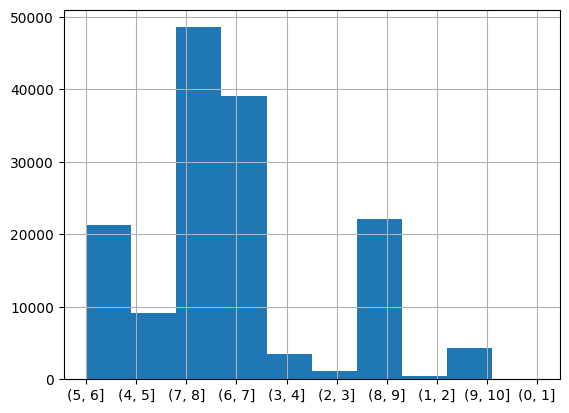

In [122]:
df['rating'].hist()

<Axes: >

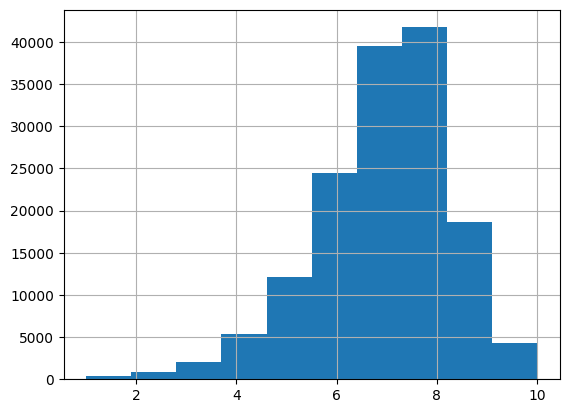

In [123]:
df['averageRating'].hist(bins=10)

In [124]:
df = df.drop(columns=['rating'])

In [125]:
(df['originalTitle'].duplicated()==True).value_counts()

originalTitle
False    133101
True      16420
Name: count, dtype: int64

In [126]:
df[df['originalTitle'].duplicated(keep=False)].sort_values(by="originalTitle").head(30)

,originalTitle,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
77240,'Til Death Do Us Part,2008,<NA>,48,0,474,1,10,36,0,162,0,tvEpisode,0,False,True,0,1,6,475,['CA'],"Crime,Drama,Mystery",15,41,7.5,"['\\N', 'CA']",0,4,1,[],7
57548,'Til Death Do Us Part,1962,<NA>,60,0,133,1,10,2,0,31,3,tvEpisode,0,False,True,0,0,5,133,NaN,"Crime,Drama,Horror",13,4,7.2,['\\N'],4,2,1,['mono'],0
45189,'Tis Pity She's a Whore,1997,<NA>,45,0,26,1,10,0,0,55,0,tvEpisode,0,False,True,0,1,0,26,['US'],"Crime,Drama,Mystery",21,1,6.8,"['\\N', 'US']",0,2,1,['stereo'],0
31482,'Tis Pity She's a Whore,1980,<NA>,135,0,33,1,10,2,0,24,0,tvMovie,0,False,True,0,1,0,33,['GB'],Drama,14,2,6.9,"['\\N', 'GB']",2,1,1,['mono'],0
25205,'Twas the Night Before Christmas,1974,<NA>,25,0,3836,1,10,28,8,33,15,tvMovie,0,False,True,0,4,37,3837,"['US', 'JP']","Animation,Comedy,Family",10,25,7.3,"['\\N', 'GB', 'US', 'HU', 'SUHH']",20,2,2,[],25
49321,'Twas the Night Before Christmas,1955,<NA>,30,0,450,1,10,5,0,24,2,tvEpisode,0,False,True,0,1,4,450,['US'],"Comedy,Family",7,2,9.0,"['\\N', 'US']",2,3,1,['mono'],7
69457,1,2019,<NA>,<NA>,0,88,1,10,1,0,116,0,tvEpisode,0,False,True,0,0,1,88,NaN,"Crime,Drama,Thriller",20,3,6.8,['\\N'],0,4,1,[],0
80575,1,2020,<NA>,<NA>,0,6,1,10,0,0,4,0,tvEpisode,0,False,True,0,0,0,6,NaN,Documentary,4,2,6.8,['\\N'],0,0,0,[],0
135822,1. Bolum,2006,<NA>,<NA>,0,13,1,10,0,0,29,0,tvEpisode,0,False,True,0,0,1,13,NaN,"Action,Crime,Drama",23,0,8.9,['\\N'],0,1,1,[],0
93674,1. Bolum,2021,<NA>,96,0,37,1,10,16,0,72,0,tvEpisode,0,False,True,0,1,0,37,['TR'],Drama,15,3,7.9,"['\\N', 'TR']",0,2,1,[],0


In [127]:
df_sorted = df.sort_values(by=["originalTitle", "startYear", "numVotes"], ascending=[True, True, False])

# if year is the same keep only the one with more votes
df_filtered = df_sorted.drop_duplicates(subset=["originalTitle", "startYear"], keep="first")


In [128]:
df.shape

(149521, 31)

In [129]:
df_filtered.shape

(145404, 31)

In [130]:
df = df_filtered

In [131]:
df[df['originalTitle'].duplicated(keep=False)] \
    .sort_values(by=['originalTitle', 'startYear']) \
    .head(20)


,originalTitle,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
57548,'Til Death Do Us Part,1962,<NA>,60,0,133,1,10,2,0,31,3,tvEpisode,0,False,True,0,0,5,133,NaN,"Crime,Drama,Horror",13,4,7.2,['\\N'],4,2,1,['mono'],0
77240,'Til Death Do Us Part,2008,<NA>,48,0,474,1,10,36,0,162,0,tvEpisode,0,False,True,0,1,6,475,['CA'],"Crime,Drama,Mystery",15,41,7.5,"['\\N', 'CA']",0,4,1,[],7
31482,'Tis Pity She's a Whore,1980,<NA>,135,0,33,1,10,2,0,24,0,tvMovie,0,False,True,0,1,0,33,['GB'],Drama,14,2,6.9,"['\\N', 'GB']",2,1,1,['mono'],0
45189,'Tis Pity She's a Whore,1997,<NA>,45,0,26,1,10,0,0,55,0,tvEpisode,0,False,True,0,1,0,26,['US'],"Crime,Drama,Mystery",21,1,6.8,"['\\N', 'US']",0,2,1,['stereo'],0
49321,'Twas the Night Before Christmas,1955,<NA>,30,0,450,1,10,5,0,24,2,tvEpisode,0,False,True,0,1,4,450,['US'],"Comedy,Family",7,2,9.0,"['\\N', 'US']",2,3,1,['mono'],7
25205,'Twas the Night Before Christmas,1974,<NA>,25,0,3836,1,10,28,8,33,15,tvMovie,0,False,True,0,4,37,3837,"['US', 'JP']","Animation,Comedy,Family",10,25,7.3,"['\\N', 'GB', 'US', 'HU', 'SUHH']",20,2,2,[],25
69457,1,2019,<NA>,<NA>,0,88,1,10,1,0,116,0,tvEpisode,0,False,True,0,0,1,88,NaN,"Crime,Drama,Thriller",20,3,6.8,['\\N'],0,4,1,[],0
80575,1,2020,<NA>,<NA>,0,6,1,10,0,0,4,0,tvEpisode,0,False,True,0,0,0,6,NaN,Documentary,4,2,6.8,['\\N'],0,0,0,[],0
135822,1. Bolum,2006,<NA>,<NA>,0,13,1,10,0,0,29,0,tvEpisode,0,False,True,0,0,1,13,NaN,"Action,Crime,Drama",23,0,8.9,['\\N'],0,1,1,[],0
93674,1. Bolum,2021,<NA>,96,0,37,1,10,16,0,72,0,tvEpisode,0,False,True,0,1,0,37,['TR'],Drama,15,3,7.9,"['\\N', 'TR']",0,2,1,[],0


In [132]:
df['runtimeMinutes'].isna().value_counts()

runtimeMinutes
False    107644
True      37760
Name: count, dtype: int64

In [133]:
df['titleType'].unique()

array(['short', 'video', 'tvEpisode', 'movie', 'tvSeries', 'tvMovie',
       'tvShort', 'tvSpecial', 'tvMiniSeries', 'videoGame'], dtype=object)

In [134]:
df['titleType'].value_counts()

titleType
tvEpisode       66870
movie           37063
short           16307
tvSeries         9185
tvMovie          6047
video            5132
videoGame        1766
tvMiniSeries     1616
tvSpecial        1149
tvShort           269
Name: count, dtype: int64

In [135]:
df['runtimeMinutes'].isna().sum()

37760

In [136]:
distribution_N = df[df['runtimeMinutes'].isna()].groupby("titleType").size()
distribution_N

titleType
movie            3684
short            1944
tvEpisode       23697
tvMiniSeries      715
tvMovie           880
tvSeries         3830
tvShort            21
tvSpecial         405
video             834
videoGame        1750
dtype: int64

Compute Runtime stats for each titleType

In [137]:
# Change '\N' with NaN and convert to numeric
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

duration_stats = df.groupby("titleType")['runtimeMinutes'].agg(['mean', 'median']).reset_index()

duration_stats

/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_82633/306249222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')


,titleType,mean,median
0,movie,93.271937,90.0
1,short,13.911369,12.0
2,tvEpisode,38.229333,30.0
3,tvMiniSeries,113.819090,60.0
4,tvMovie,83.036191,87.0
5,tvSeries,49.764893,30.0
6,tvShort,12.528226,10.0
7,tvSpecial,92.587366,68.0
8,video,70.342718,74.0
9,videoGame,88.500000,55.0


In [138]:
df['runtimeMinutes'].isnull().sum()

37760

Fill NaN in runtimeMinutes with median value by each title type

In [139]:
df['runtimeMinutes'] = df.groupby("titleType")['runtimeMinutes'].transform(lambda x: x.fillna(x.median()))

/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_82633/807592393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtimeMinutes'] = df.groupby("titleType")['runtimeMinutes'].transform(lambda x: x.fillna(x.median()))


In [140]:
df['runtimeMinutes'].isnull().sum()

0

In [141]:
df['awardWins'].value_counts().sort_index(ascending=False)

awardWins
446         1
349         1
254         2
251         1
243         1
200         1
145         1
125         1
110         1
109         1
108         1
93          2
92          2
91          1
87          1
86          1
85          1
83          3
77          1
76          1
75          1
74          1
73          1
72          2
70          2
69          1
68          1
64          1
62          3
61          1
60          1
59          1
57          1
56          2
55          1
54          2
53          1
50          3
49          3
48          1
47          1
46          1
44          4
43          2
41          2
40          3
39          5
38          7
37          4
36          3
35          7
34          7
33         11
32          3
31          6
30          9
29          6
28         16
27          6
26         11
25         10
24         16
23         15
22         25
21         16
20         26
19         33
18         24
17         39
16         44
15        

In [142]:
df["countryOfOrigin"].head(10)

110402    ['US']
94778     ['US']
55073     ['US']
73193     ['US']
74235        NaN
75248        NaN
70841     ['BE']
82956        NaN
87443        NaN
92123        NaN
Name: countryOfOrigin, dtype: object

In [143]:
import ast
# Safely parse countryOfOrigin, handling strings, lists, and NaNs
def parse_country(val):
    if pd.isna(val):
        return ['Unknown']
    elif isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except:
            return ['Unknown']
    return val  # already a list

df['countryOfOrigin'] = df['countryOfOrigin'].apply(parse_country)


/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_82633/2670710568.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countryOfOrigin'] = df['countryOfOrigin'].apply(parse_country)


In [152]:
df["countryOfOrigin"].tail(20)

138356    [Unknown]
65230      [AT, LU]
16830          [DE]
17133         [XWG]
119329         [US]
6956          [XWG]
66057     [Unknown]
105823         [DE]
108878         [EE]
94855          [HU]
69196     [Unknown]
4820           [HU]
96467          [HU]
40648          [TR]
33795          [TR]
32423          [TR]
106064         [AZ]
30024          [TR]
25253          [IS]
145649         [JP]
Name: countryOfOrigin, dtype: object

In [145]:
df = df.drop(columns=['worstRating', 'bestRating', 'isRatable', 'endYear'])

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145404 entries, 110402 to 145649
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   originalTitle                145404 non-null  object 
 1   startYear                    145404 non-null  int64  
 2   runtimeMinutes               145404 non-null  float64
 3   awardWins                    145404 non-null  int64  
 4   numVotes                     145404 non-null  int64  
 5   totalImages                  145404 non-null  int64  
 6   totalVideos                  145404 non-null  int64  
 7   totalCredits                 145404 non-null  int64  
 8   criticReviewsTotal           145404 non-null  int64  
 9   titleType                    145404 non-null  object 
 10  awardNominationsExcludeWins  145404 non-null  int64  
 11  canHaveEpisodes              145404 non-null  bool   
 12  isAdult                      145404 non-null  int64  
 13 

In [147]:
df['genres'].isna().sum()

2675

In [148]:
# Clean the 'genres' column
def clean_genres(val):
    if isinstance(val, str):
        return [g.strip() for g in val.split(',')]
    return ['Unknown']  # for NaNs

df['genres'] = df['genres'].apply(clean_genres)
df['genres'].isna().sum()


0

In [149]:
df['genres'].head()

110402             [Comedy, Short]
94778        [Comedy, Drama, News]
55073       [Action, Crime, Drama]
73193           [Horror, Thriller]
74235     [Biography, Documentary]
Name: genres, dtype: object

In [153]:
df.shape

(145404, 27)

In [48]:
df["title_length"] = df["originalTitle"].apply(len)

### *** CHECKPOINT 0.1
Backup csv file up to this point

In [167]:
backup_dataframe(df)

✅ Backup saved to backups/df_backup_20250402_185824.csv


# DEEP DATA UNDERSTADING

In [ ]:
# quick check on cols
print(df.columns)
print(df.shape)

print(df.info())

Index(['originalTitle', 'startYear', 'runtimeMinutes', 'awardWins', 'numVotes',
       'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal',
       'titleType', 'awardNominationsExcludeWins', 'canHaveEpisodes',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'castNumber', 'companiesNumber',
       'averageRating', 'regions', 'externalLinks', 'writerCredits',
       'directorsCredits', 'soundMixes', 'quotesTotal'],
      dtype='object')
(145404, 27)
<class 'pandas.core.frame.DataFrame'>
Index: 145404 entries, 110402 to 145649
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   originalTitle                145404 non-null  object 
 1   startYear                    145404 non-null  int64  
 2   runtimeMinutes               145404 non-null  float64
 3   awardWins                    145404 non-null  int64  
 4   numVotes

In [ ]:
# update
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

In [170]:
bool_cols.append("isAdult")
numeric_cols.remove("isAdult")

## NUMERICAL VIZ

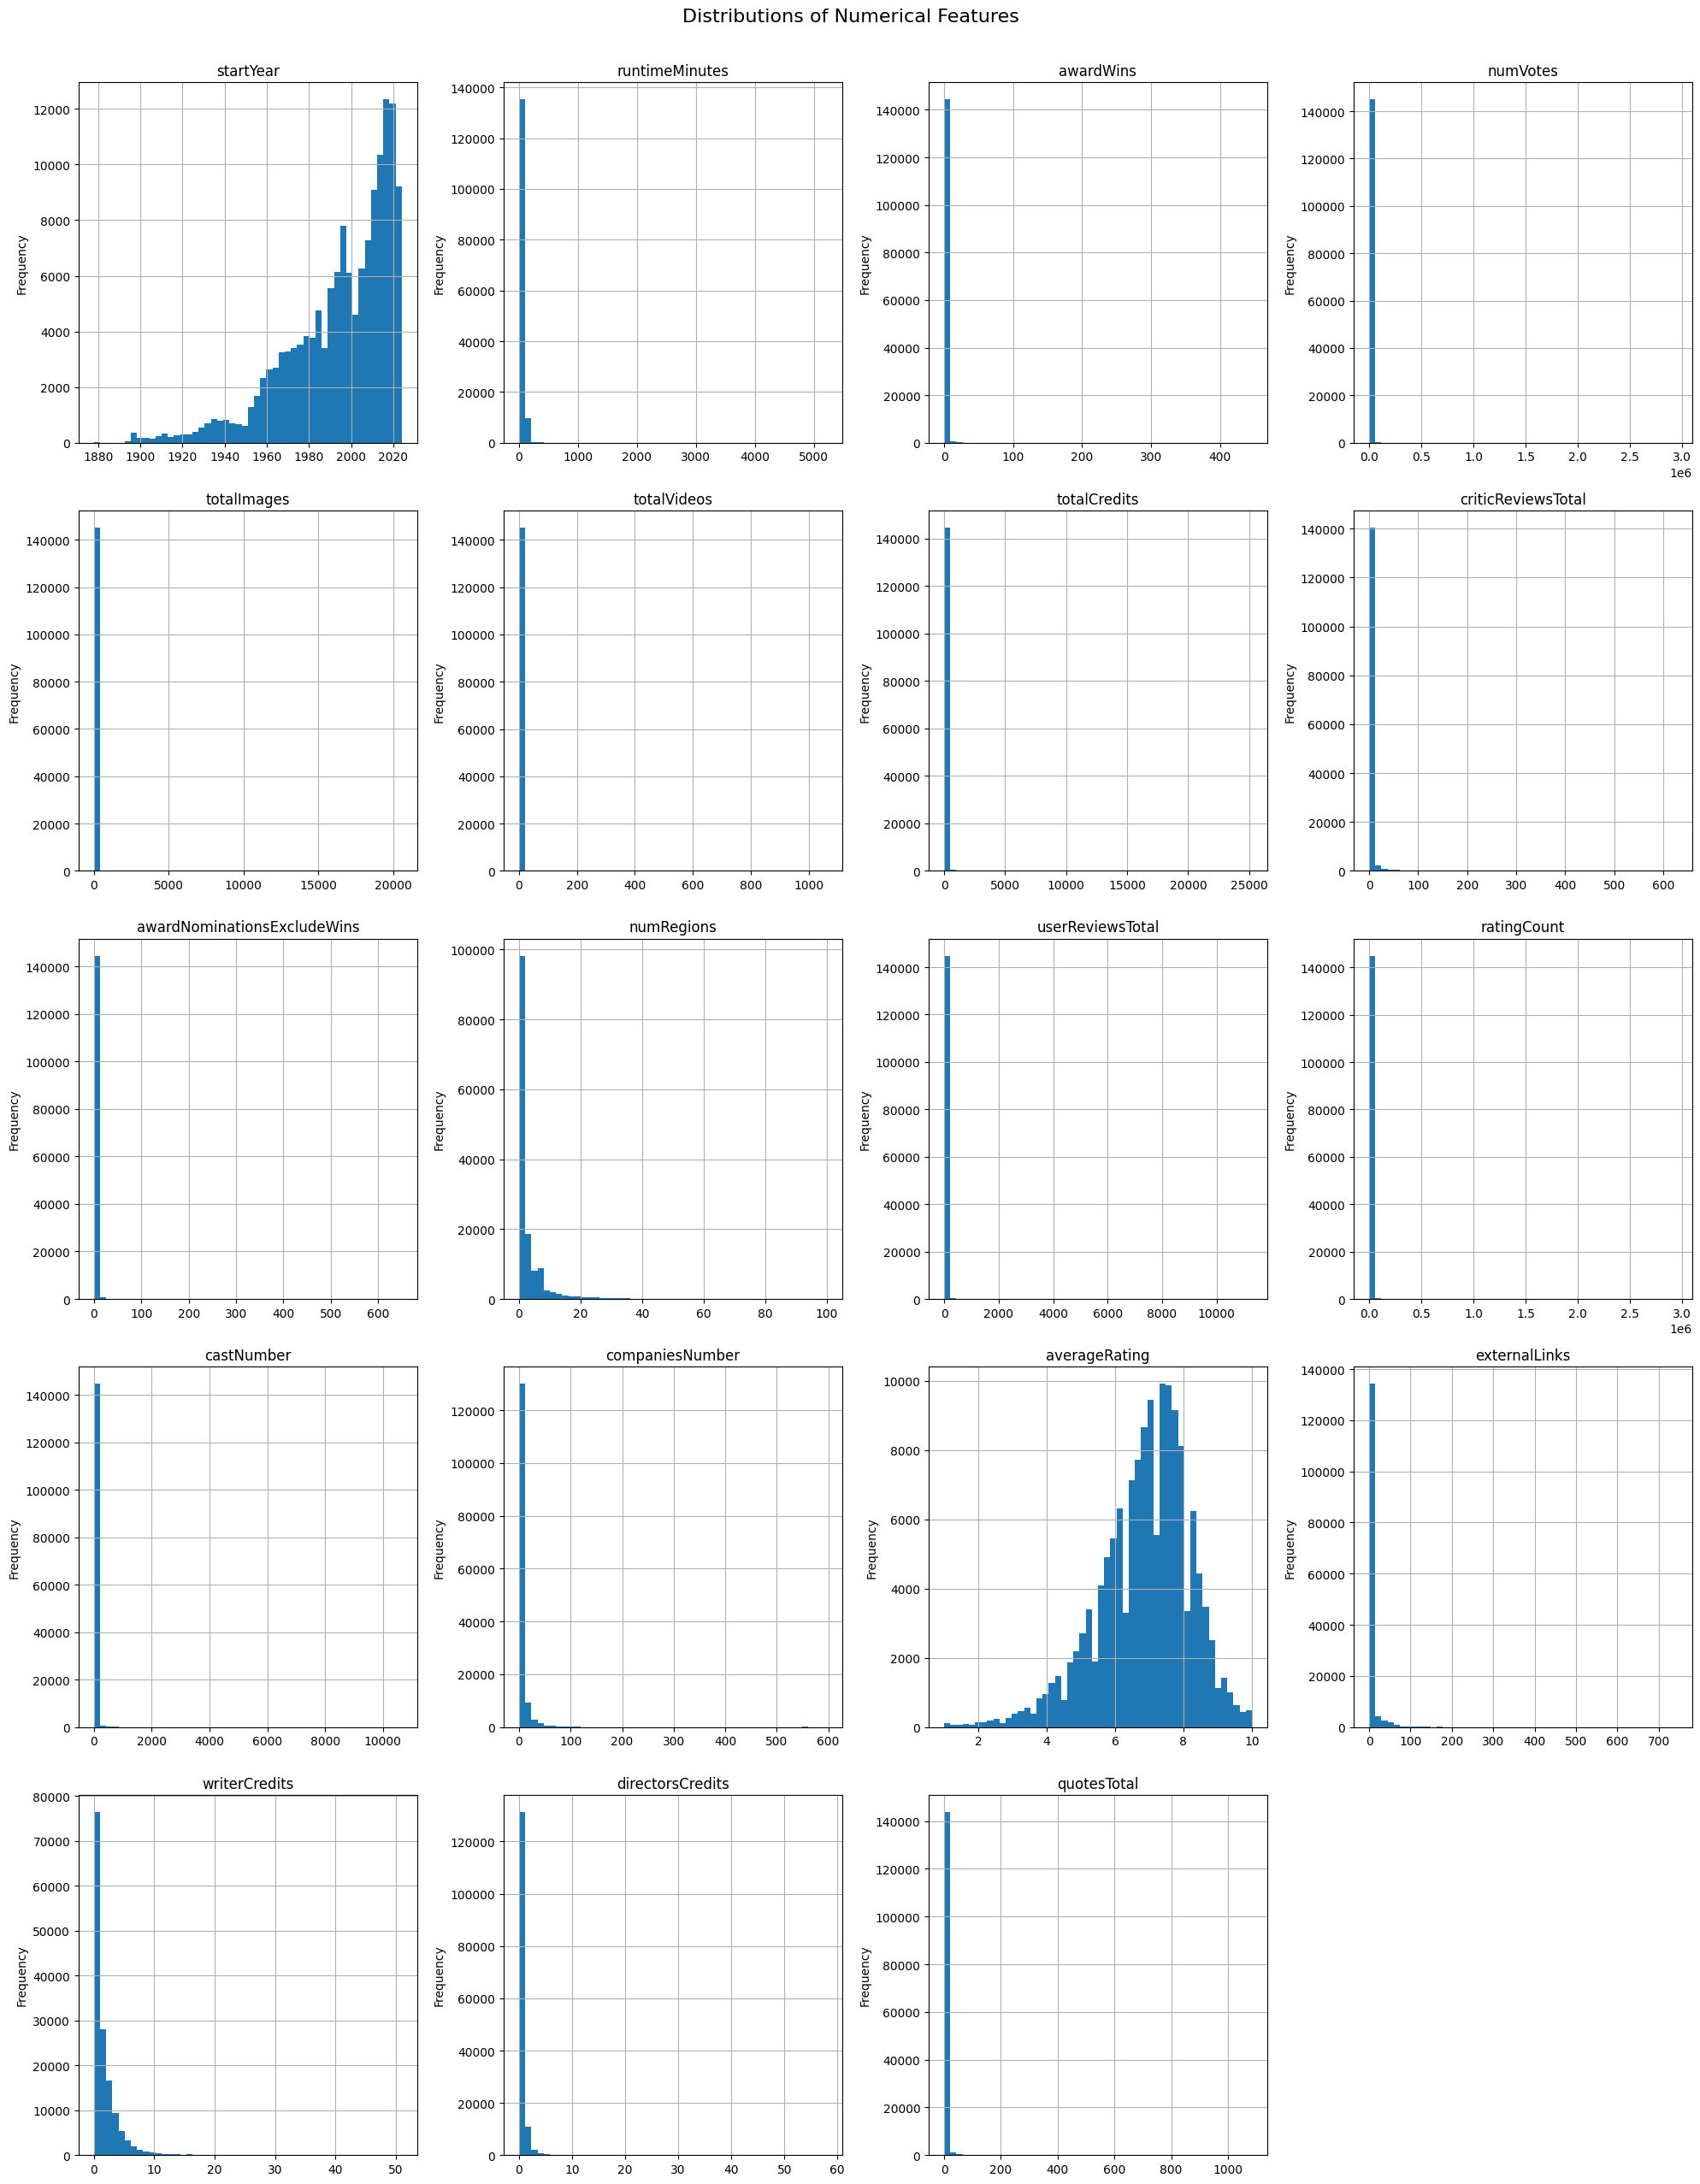

In [ ]:
# Set up grid layout for plotting all numerical distributions
import math

num_cols = len(numeric_cols)
cols = 4  # Number of columns in the grid
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(20, 5 * rows))

for i, col in enumerate(numeric_cols, 1):
   plt.subplot(rows, cols, i)
   df[col].hist(bins=50)
   plt.title(col)
   plt.xlabel("")
   plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Distributions of Numerical Features", fontsize=16, y=1.02)
plt.show()

**Takeaways at a Glance**:

**Highly skewed**: numVotes, ratingCount, userReviewsTotal, castNumber, etc.

**Binary/flat**: isAdult barely varies

**Normally distributed**: averageRating is nicely shaped

**Year-based**: startYear has a long historical tail

## CAT & BOOL VIZ

In [174]:
# Separate columns
list_based_cols = ['genres', 'countryOfOrigin']
standard_categorical_cols = [col for col in categorical_cols if col not in list_based_cols]

# Summary for standard (non-list) categorical columns
categorical_summary = {
    "Column": [],
    "Unique Values": [],
    "Top 5 Values": []
}

for col in standard_categorical_cols:
    categorical_summary["Column"].append(col)
    categorical_summary["Unique Values"].append(df[col].nunique())
    categorical_summary["Top 5 Values"].append(df[col].value_counts().head(5).to_dict())

# Separate list-based column summaries
from collections import Counter

list_based_summary = {
    "Column": [],
    "Unique Items": [],
    "Top 5 Items": []
}

for col in list_based_cols:
    # Flatten the lists
    flat_list = [item for sublist in df[col] for item in sublist]
    counts = Counter(flat_list)
    list_based_summary["Column"].append(col)
    list_based_summary["Unique Items"].append(len(counts))
    list_based_summary["Top 5 Items"].append(dict(counts.most_common(5)))

# Display both summaries
cat_summary_df = pd.DataFrame(categorical_summary)
list_summary_df = pd.DataFrame(list_based_summary)


In [182]:
# Get value counts for boolean columns
bool_summaries = {col: df[col].value_counts(dropna=False) for col in bool_cols}
bool_summaries

{'canHaveEpisodes': canHaveEpisodes
 False    134600
 True      10804
 Name: count, dtype: int64,
 'isAdult': isAdult
 0    142686
 1      2718
 Name: count, dtype: int64}

In [179]:
cat_summary_df

,Column,Unique Values,Top 5 Values
0,originalTitle,133101,"{'Episode #1.1': 56, 'Episode #1.2': 56, 'Episode #1.3': 53, 'Pilot': 49, 'Episode #1.5': 47}"
1,titleType,10,"{'tvEpisode': 66870, 'movie': 37063, 'short': 16307, 'tvSeries': 9185, 'tvMovie': 6047}"
2,regions,26120,"{'['\\N']': 34478, '['\\N', 'US']': 31169, '['\\N', 'GB']': 6800, '['\\N', 'PT', 'IN', 'FR', 'IT', 'DE', 'JP', 'ES']': 4725, '['\\N', 'JP']': 3044}"
3,soundMixes,305,"{'[]': 93343, '['mono']': 22741, '['stereo']': 16246, '['dolby_digital']': 4056, '['silent']': 3289}"


In [180]:
list_summary_df

,Column,Unique Items,Top 5 Items
0,genres,29,"{'Drama': 49509, 'Comedy': 46101, 'Action': 18511, 'Animation': 17697, 'Adventure': 17542}"
1,countryOfOrigin,201,"{'US': 47664, 'Unknown': 37125, 'GB': 11229, 'JP': 5547, 'FR': 5487}"


Title sentiment analysis

In [49]:
#!pip install textblob

In [50]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

#nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/daviderizzello/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
df["word_count"] = df["originalTitle"].apply(lambda x: len(x.split()))

# Analisi del sentiment con VADER
df["sentiment_score"] = df["originalTitle"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment"] = df["sentiment_score"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))


In [52]:
"""
PROVA ANDATA MALE
#!pip install langdetect
from langdetect import detect, DetectorFactory
import langdetect

# Imposta un seed per rendere la rilevazione più stabile
DetectorFactory.seed = 0

# Funzione per gestire errori di rilevamento
def detect_language_safe(text):
    try:
        return detect(text)
    except langdetect.lang_detect_exception.LangDetectException:
        return "unknown"

df["language"] = df["originalTitle"].apply(detect_language_safe)
"""

'\nPROVA ANDATA MALE\n#!pip install langdetect\nfrom langdetect import detect, DetectorFactory\nimport langdetect\n\n# Imposta un seed per rendere la rilevazione più stabile\nDetectorFactory.seed = 0\n\n# Funzione per gestire errori di rilevamento\ndef detect_language_safe(text):\n    try:\n        return detect(text)\n    except langdetect.lang_detect_exception.LangDetectException:\n        return "unknown"\n\ndf["language"] = df["originalTitle"].apply(detect_language_safe)\n'

In [53]:
df['sentiment'].value_counts()

sentiment
Neutral     126049
Positive     11307
Negative      8048
Name: count, dtype: int64

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2_V2/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='title_length', ylabel='Count'>

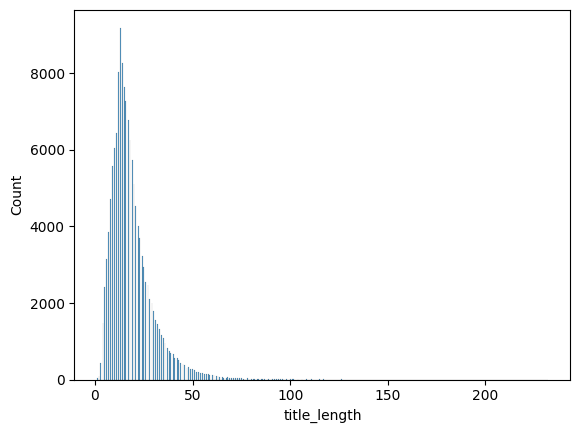

In [54]:
sns.histplot(data=df, x="title_length")

In [55]:
df.head()

,originalTitle,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,title_length,word_count,sentiment_score,sentiment
110402,#,2012,15.0,0,12,1,0,24,0,short,0,False,0,1,0,12,['US'],"Comedy,Short",7,2,3.3,"['\\N', 'US']",0,1,1,[],0,1,1,0.0,Neutral
94778,#1,2010,12.0,0,9,1,0,21,0,video,0,False,0,1,0,9,['US'],"Comedy,Drama,News",11,1,5.9,"['\\N', 'US']",0,1,1,[],0,2,1,0.0,Neutral
55073,#1 with a Bullet,1984,48.0,0,58,1,0,76,0,tvEpisode,0,False,0,1,1,58,['US'],"Action,Crime,Drama",19,11,7.2,"['\\N', 'US']",0,4,1,['mono'],0,16,4,0.0,Neutral
73193,#1915House,2018,55.0,0,20,2,0,6,0,movie,0,False,0,1,1,20,['US'],"Horror,Thriller",1,1,3.4,"['\\N', 'US']",3,1,1,[],0,10,1,0.0,Neutral
74235,#200 - Mackenzie Davis,2019,30.0,0,15,1,1,7,0,tvEpisode,0,False,0,0,0,15,NaN,"Biography,Documentary",1,0,6.4,['\\N'],0,2,2,[],0,22,4,0.0,Neutral


In [56]:
df["num_countries"] = df["countryOfOrigin"].apply(lambda x: len(str(x).split(",")) if pd.notna(x) else 0)


In [57]:
df["num_countries"].value_counts()

num_countries
1     100780
0      37125
2       5761
3       1162
4        332
5        150
6         42
7         23
8         12
9          6
10         4
21         1
15         1
29         1
17         1
26         1
14         1
13         1
Name: count, dtype: int64

In [59]:
df[df["num_countries"]==8]

,originalTitle,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,title_length,word_count,sentiment_score,sentiment,num_countries
34494,Alexander,2004,175.0,6,178046,247,17,1129,233,movie,19,False,0,49,1490,178062,"['US', 'GB', 'DE', 'NL', 'FR', 'IT', 'MA', 'TH']","Action,Biography,Drama",89,110,5.6,"['\\N', 'IE', 'IL', 'IN', 'IT', 'NL', 'PH', 'S...",359,3,1,"['dts', 'dolby_digital', 'sdds']",114,9,1,0.0,Neutral,8
104394,Assassin's Creed,2016,115.0,2,210899,183,23,2360,290,movie,2,False,0,40,774,210958,"['US', 'FR', 'GB', 'HK', 'TW', 'MT', 'ES', 'CA']","Action,Adventure,Sci-Fi",88,149,5.6,"['\\N', 'EG', 'ES', 'FR', 'GB', 'GR', 'HU', 'I...",351,6,1,"['dolby_digital', 'dolby_surround 7.1', 'dolby...",40,16,2,0.0,Neutral,8
35900,Astérix et les Vikings,2006,78.0,0,12879,152,0,636,31,movie,1,False,0,31,33,12880,"['FR', 'DK', 'BE', 'TH', 'CN', 'DE', 'LV', 'ES']","Adventure,Animation,Comedy",74,91,6.0,"['\\N', 'LV', 'CZ', 'SK', 'IT', 'BR', 'PT', 'N...",87,7,2,"['dts', 'dolby_digital']",11,22,4,0.0,Neutral,8
96498,Beware of Christians,2011,94.0,0,344,4,1,19,2,movie,0,False,0,1,8,344,"['US', 'ES', 'HU', 'IT', 'FR', 'DE', 'HR', 'CH']","Comedy,Documentary",4,2,6.4,"['\\N', 'US']",5,2,1,[],1,20,3,0.0,Neutral,8
121311,Der 8. Kontinent,2015,101.0,0,99,5,0,50,5,movie,0,False,0,1,2,99,"['DE', 'US', 'ZA', 'NO', 'IT', 'HK', 'BR', 'AU']","Drama,Family",25,4,7.8,"['\\N', 'DE']",31,2,1,[],0,16,3,0.0,Neutral,8
110708,Domakinstvo za pocetnici,2023,107.0,9,968,7,6,111,20,movie,7,False,0,19,6,979,"['MK', 'PL', 'HR', 'RS', 'XKV', 'SE', 'US', 'AU']","Comedy,Drama",48,22,7.0,"['\\N', 'XWW', 'DE', 'JP', 'HR', 'IT', 'FR', '...",22,1,1,['dolby_digital'],0,24,3,0.0,Neutral,8
115418,El auge del humano 3,2023,121.0,3,96,10,0,48,13,movie,8,False,0,15,0,98,"['AR', 'PT', 'NL', 'BR', 'TW', 'HK', 'LK', 'PE']",Drama,6,9,6.3,"['\\N', 'AR', 'JP', 'BR', 'PT', 'GR', 'CN', 'T...",17,1,1,[],0,20,5,0.0,Neutral,8
21592,Esther,1999,90.0,0,1702,77,0,112,3,tvMovie,0,False,0,14,18,1704,"['IT', 'DE', 'FR', 'ES', 'US', 'CZ', 'NL', 'GB']","Biography,Drama,History",27,26,6.6,"['\\N', 'BR', 'FR', 'HU', 'GR', 'ES', 'FI', 'U...",14,1,1,['stereo'],0,6,1,0.0,Neutral,8
123562,Godzilla: King of the Monsters,2019,132.0,5,213854,411,23,2724,384,movie,14,False,0,58,2360,213996,"['US', 'JP', 'MX', 'CN', 'GB', 'CA', 'KR', 'NZ']","Action,Adventure,Fantasy",125,135,6.0,"['\\N', 'IN', 'KR', 'NZ', 'PH', 'SG', 'TH', 'U...",469,5,1,"['dolby_atmos', 'dts:x', 'auro_11.1', 'dolby_d...",54,30,5,0.0,Neutral,8
101818,In My Lifetime: A Presentation of the Nuclear ...,2011,112.0,0,23,1,0,35,0,movie,0,False,0,3,0,23,"['US', 'AT', 'IS', 'CZ', 'NO', 'JP', 'FR', 'GB']","Documentary,History,News",13,1,7.1,"['\\N', 'HU', 'US', 'GR']",2,0,1,[],0,59,10,0.0,Neutral,8


In [60]:
df["award_ratio"] = df["awardWins"] / (df["awardNominationsExcludeWins"] + df["awardWins"] + 1)

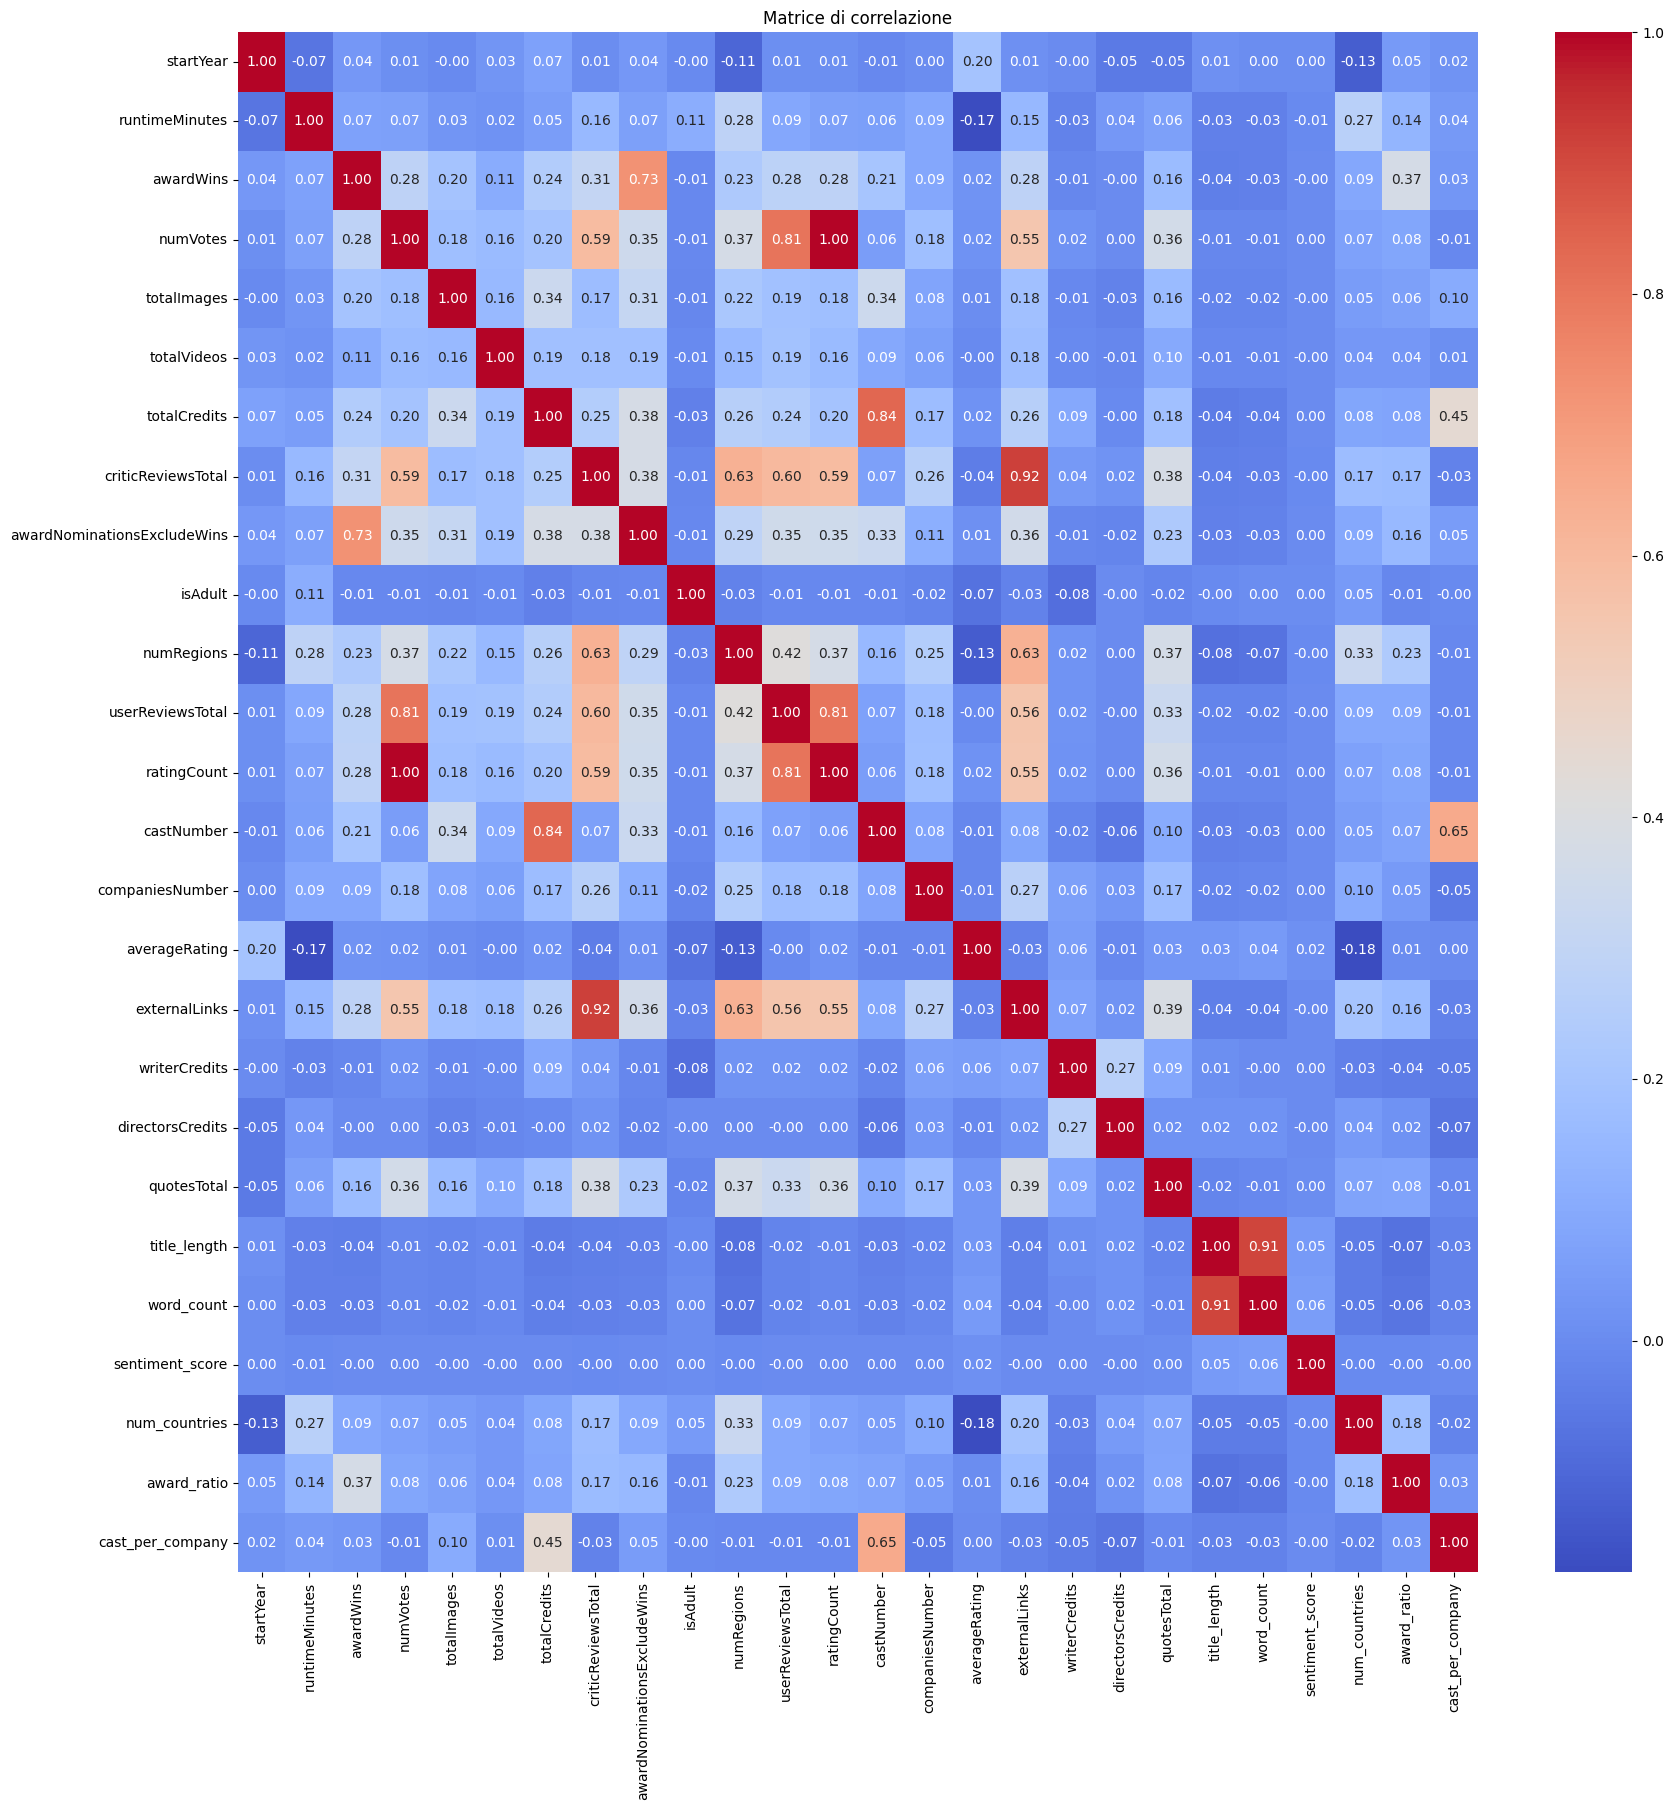

In [69]:
df_numeric = df.select_dtypes(include=["number"])  # Seleziona solo colonne numeriche
corr_matrix = df_numeric.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice di correlazione")
plt.show()



In [70]:
df.shape

(145404, 34)

In [71]:
df['directorsCredits'].value_counts()

directorsCredits
1     102426
0      28865
2      10812
3       1919
4        685
5        296
6        157
7         94
8         47
10        22
9         21
11        15
22         8
12         6
13         6
15         5
14         5
21         4
31         2
16         2
20         1
36         1
33         1
58         1
19         1
23         1
50         1
Name: count, dtype: int64

In [72]:
df['quotesTotal'].value_counts()

quotesTotal
0       124873
1         5513
2         2853
3         2009
4         1597
5         1375
6          917
7          802
8          650
9          493
10         466
11         359
12         311
13         262
15         239
14         236
16         191
17         159
19         147
18         139
20         135
21         115
22         100
25          91
24          91
23          80
26          75
27          64
28          63
32          53
29          44
33          43
30          41
31          41
37          40
35          34
39          32
34          30
38          30
42          26
40          25
44          25
45          22
48          22
43          22
36          21
50          18
58          17
41          17
52          15
51          15
55          14
49          14
60          13
47          13
66          12
54          12
59          11
46          11
62          11
64          10
67           9
65           9
79           9
83           8
74           

In [73]:
df['externalLinks'].value_counts()

externalLinks
0      63560
1      27055
2      15824
3       8573
4       5051
5       3523
6       2441
7       1855
8       1445
9       1157
10      1004
11       848
12       749
13       629
14       544
15       482
16       442
17       409
22       339
19       338
18       327
20       326
21       312
49       263
33       262
35       246
54       245
24       243
39       239
34       237
23       228
25       217
26       200
38       199
31       193
27       183
50       174
29       169
48       165
28       165
59       157
30       156
53       149
42       148
36       145
44       140
40       139
52       136
47       130
32       125
64       124
37       121
43       118
60       112
58       111
63       110
46       110
41       110
51        92
45        87
61        83
69        79
62        74
65        74
70        59
55        53
77        51
57        45
56        43
71        37
81        37
66        36
78        30
73        30
67        30
68        2

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2_V2/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='award_ratio', ylabel='Count'>

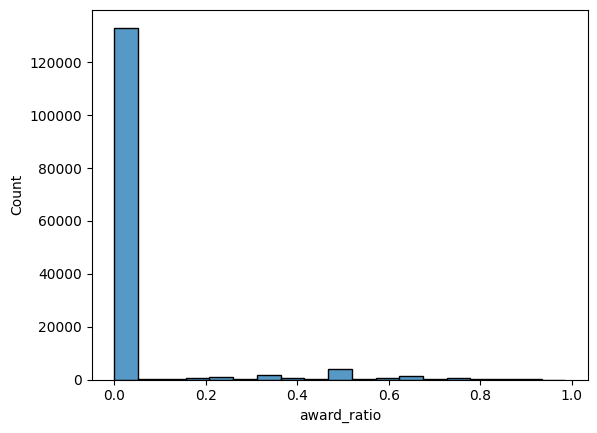

In [78]:
sns.histplot(data=df, x = "award_ratio")

In [ ]:
df['total_multimedia'] = df['totalImages'] + df['totalVideos']

In [87]:
df = df.drop(columns= ["totalImages", "totalVideos"])

In [88]:
df.shape

(145404, 32)

In [89]:
df.head()

,originalTitle,startYear,runtimeMinutes,awardWins,numVotes,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,title_length,word_count,sentiment_score,sentiment,num_countries,award_ratio,total_multimedia
110402,#,2012,15.0,0,12,24,0,short,0,False,0,1,0,12,['US'],"Comedy,Short",7,2,3.3,"['\\N', 'US']",0,1,1,[],0,1,1,0.0,Neutral,1,0.0,1
94778,#1,2010,12.0,0,9,21,0,video,0,False,0,1,0,9,['US'],"Comedy,Drama,News",11,1,5.9,"['\\N', 'US']",0,1,1,[],0,2,1,0.0,Neutral,1,0.0,1
55073,#1 with a Bullet,1984,48.0,0,58,76,0,tvEpisode,0,False,0,1,1,58,['US'],"Action,Crime,Drama",19,11,7.2,"['\\N', 'US']",0,4,1,['mono'],0,16,4,0.0,Neutral,1,0.0,1
73193,#1915House,2018,55.0,0,20,6,0,movie,0,False,0,1,1,20,['US'],"Horror,Thriller",1,1,3.4,"['\\N', 'US']",3,1,1,[],0,10,1,0.0,Neutral,1,0.0,2
74235,#200 - Mackenzie Davis,2019,30.0,0,15,7,0,tvEpisode,0,False,0,0,0,15,NaN,"Biography,Documentary",1,0,6.4,['\\N'],0,2,2,[],0,22,4,0.0,Neutral,0,0.0,2


In [90]:
df = df.drop(columns = "originalTitle")

In [91]:
df.columns

Index(['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'ratingCount', 'countryOfOrigin', 'genres', 'castNumber',
       'companiesNumber', 'averageRating', 'regions', 'externalLinks',
       'writerCredits', 'directorsCredits', 'soundMixes', 'quotesTotal',
       'title_length', 'word_count', 'sentiment_score', 'sentiment',
       'num_countries', 'award_ratio', 'total_multimedia'],
      dtype='object')